In [1]:
import stac
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import joblib

In [2]:
df = pd.read_csv("../windowed_f_scores.csv")
display(df)

,Unnamed: 0,Dataset,Anomaly Detection Method,Num Score,Windowed F-Score
0,0,Twitter_volume_FB_filled.csv,anomalous,0,0.666667
1,1,Twitter_volume_FB_filled.csv,anomalous,1,0.666667
2,2,Twitter_volume_FB_filled.csv,anomalous,2,0.666667
3,3,Twitter_volume_FB_filled.csv,anomalous,3,0.666667
4,4,Twitter_volume_FB_filled.csv,anomalous,4,0.666667
...,...,...,...,...,...
5507,5507,ibm-common-stock-closing-prices_filled.csv,windowed_gaussian,5,0.181818
5508,5508,ibm-common-stock-closing-prices_filled.csv,windowed_gaussian,6,0.181818
5509,5509,ibm-common-stock-closing-prices_filled.csv,windowed_gaussian,7,0.181818
5510,5510,ibm-common-stock-closing-prices_filled.csv,windowed_gaussian,8,0.181818


In [3]:
collapsed_df = df.groupby(['Dataset', 'Anomaly Detection Method']).agg({'Windowed F-Score': ['mean', 'min', 'max']})

In [4]:
pd.set_option('display.max_rows', 310)
collapsed_df

Windowed F-Score  \
                                                                                   mean   
Dataset                                       Anomaly Detection Method                    
FARM_filled.csv                               anomalous                        0.000000   
                                              fb                               0.181818   
                                              glim                             0.181818   
                                              hstree                           0.181818   
                                              htm                              0.181818   
                                              matrix_profile                   0.231540   
                                              pbad                             0.181818   
                                              sarimax                          0.181818   
                                              stl                              0.181818   
                                              twitter                          0.000000   
                                              vae                              0.206579   
                                              windowed_gaussian                0.187500   
Twitter_volume_AMZN_filled.csv                anomalous                        0.666667   
                                              fb                               0.380952   
                                              glim                             0.380952   
                                              hstree                           0.343647   
                                              htm                              0.333333   
                                              matrix_profile                   0.018182   
                                              pbad                             0.181818   
                                              sarimax                          0.186047   
                                              stl                              0.222222   
                                              twitter                          0.275862   
                                              vae                              0.191936   
                                              windowed_gaussian                0.363636   
Twitter_volume_FB_filled.csv                  anomalous                        0.666667   
                                              fb                               0.235294   
                                              glim                             0.250000   
                                              hstree                           0.800000   
                                              htm                              0.800000   
                                              matrix_profile                   0.036364   
                                              pbad                             0.181818   
                                              sarimax                          0.235294   
                                              stl                              0.250000   
                                              twitter                          0.190476   
                                              vae                              0.201353   
                                              windowed_gaussian                0.266667   
Twitter_volume_GOOG_filled.csv                anomalous                        0.750000   
                                              fb                               0.181818   
                                              glim                             0.205128   
                                              hstree                           0.194286   
                                              htm                              0.205128   
                                              matrix_profile       

In [5]:
# collapsed_df.to_csv("collapsed_df.csv")

In [6]:
# edit the csv

In [7]:
edited_collapsed_df = pd.read_csv("collapsed_df.csv")
edited_collapsed_df

,Dataset,Anomaly Detection Method,Windowed F-Score
0,FARM_filled.csv,anomalous,0.000000
1,FARM_filled.csv,fb,0.181818
2,FARM_filled.csv,glim,0.181818
3,FARM_filled.csv,hstree,0.181818
4,FARM_filled.csv,htm,0.181818
5,FARM_filled.csv,matrix_profile,0.225130
6,FARM_filled.csv,pbad,0.181818
7,FARM_filled.csv,sarimax,0.181818
8,FARM_filled.csv,stl,0.181818
9,FARM_filled.csv,twitter,0.000000


In [8]:
# Helper functions for performing the statistical tests
def generate_scores(method, method_args, data, labels):
    pairwise_scores = method(data, **method_args) # Matrix for all pairwise comaprisons
    pairwise_scores.set_axis(labels, axis='columns', inplace=True) # Label the cols
    pairwise_scores.set_axis(labels, axis='rows', inplace=True) # Label the rows, note: same label as pairwise combinations
    return pairwise_scores

def plot(scores):
    # Pretty plot of significance
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

    sp.sign_plot(scores, **heatmap_args)

def specific_plot(scores, method_list, char, alpha=.1):
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sig_array = sp.sign_array(scores, alpha)
    sig_array =sig_array.astype(int)
    sp.sign_plot(sig_array, g=method_list,flat=True,**heatmap_args)
    plt.tight_layout()
    plt.savefig("f_nemenyi_plot_" + char + ".png",dpi=300)
#     plt.savefig("f_nemenyi_plot_" + char + ".eps",format="eps")

def get_friedman_test_df(corpus):    
    # get a df where
    # rows are datasets in the seasonality/trend/concept drift corpus
    # columns are the methods 
    # elements are the auc

    dataset_column = []
    anomalous_column = []
    fb_column = []
    glim_column  = []
    hstree_column = []
    htm_column = []
    matrix_profile_column = []
    pbad_column = []
    sarimax_column = []
    stl_column = []
    twitter_column = []
    vae_column = []
    windowed_gaussian_column = []

    mypath = "../dataset_roc_auc_tables/"
    for dataset in corpus:
        dataset_column.append(dataset)
        table = edited_collapsed_df[edited_collapsed_df["Dataset"]==dataset]
    
        anomalous = table[table["Anomaly Detection Method"]=="anomalous"]["Windowed F-Score"].values
        if anomalous:
            if anomalous[0] != anomalous[0]:
                anomalous_column.append(0)
            else:
                anomalous_column.append(anomalous[0])
        else:
            anomalous_column.append(0)

        fb = table[table["Anomaly Detection Method"]=="fb"]["Windowed F-Score"].values
        if fb:
            if fb[0] != fb[0]:
                fb_column.append(0)
            else:
                fb_column.append(fb[0])
        else:
            fb_column.append(0)

        glim = table[table["Anomaly Detection Method"]=="glim"]["Windowed F-Score"].values
        if glim:
            if glim[0] != glim[0]:
                glim_column.append(0)
            else:
                glim_column.append(glim[0])
        else:
            glim_column.append(0)

        hstree = table[table["Anomaly Detection Method"]=="hstree"]["Windowed F-Score"].values
        if hstree:
            if hstree[0] != hstree[0]:
                hstree_column.append(0)
            else:
                hstree_column.append(hstree[0])
        else:
            hstree_column.append(0)

        htm = table[table["Anomaly Detection Method"]=="htm"]["Windowed F-Score"].values
        if htm:
            if htm[0] != htm[0]:
                htm_column.append(0)
            else:
                htm_column.append(htm[0])
        else:
            htm_column.append(0)

        matrix_profile = table[table["Anomaly Detection Method"]=="matrix_profile"]["Windowed F-Score"].values
        if matrix_profile:
            if matrix_profile[0] != matrix_profile[0]:
                matrix_profile_column.append(0)
            else:
                matrix_profile_column.append(matrix_profile[0])
        else:
            matrix_profile_column.append(0)

        pbad = table[table["Anomaly Detection Method"]=="pbad"]["Windowed F-Score"].values
        if pbad:
            if pbad[0] != pbad[0]:
                pbad_column.append(0)
            else:
                pbad_column.append(pbad[0])
        else:
            pbad_column.append(0)

        sarimax = table[table["Anomaly Detection Method"]=="sarimax"]["Windowed F-Score"].values
        if sarimax:
            if sarimax[0] != sarimax[0]:
                sarimax_column.append(0)
            else:
                sarimax_column.append(sarimax[0])
        else:
            sarimax_column.append(0)

        stl = table[table["Anomaly Detection Method"]=="stl"]["Windowed F-Score"].values
        if stl:
            if stl[0] != stl[0]:
                stl_column.append(0)
            else:
                stl_column.append(stl[0])
        else:
            stl_column.append(0)

        twitter = table[table["Anomaly Detection Method"]=="twitter"]["Windowed F-Score"].values
        if twitter:
            if twitter[0] != twitter[0]:
                twitter_column.append(0)
            else:
                twitter_column.append(twitter[0])
        else:
            twitter_column.append(0)

        vae = table[table["Anomaly Detection Method"]=="vae"]["Windowed F-Score"].values
        if vae:
            if vae[0] != vae[0]:
                vae_column.append(0)
            else:
                vae_column.append(vae[0])
        else:
            vae_column.append(0)

        windowed_gaussian = table[table["Anomaly Detection Method"]=="windowed_gaussian"]["Windowed F-Score"].values
        if windowed_gaussian:
            if windowed_gaussian[0] != windowed_gaussian[0]:
                windowed_gaussian_column.append(0)
            else:
                windowed_gaussian_column.append(windowed_gaussian[0])
        else:
            windowed_gaussian_column.append(0)


    df = pd.DataFrame({"Dataset": dataset_column,
                       "Anomalous": anomalous_column,
                       "Prophet": fb_column,
                       "GLiM": glim_column,
                       "HS Tree": hstree_column,
                       "HTM": htm_column,
                       "Matrix Profile": matrix_profile_column,
                       "PBAD": pbad_column,
                       "SARIMAX": sarimax_column,
                       "STL": stl_column,
                       "Twitter": twitter_column,
                       "VAE": vae_column,
                       "Windowed Gaussian": windowed_gaussian_column})

    # display(df)
    df = df.drop(['Dataset'], axis=1)
    # display(df)

    return df


def get_friedman_test_df_miss(corpus):    
    # get a df where
    # rows are datasets in the missing corpus
    # columns are the methods 
    # elements are the auc

    dataset_column = []
    anomalous_column = []
    fb_column = []
    glim_column  = []
    hstree_column = []
    htm_column = []
    matrix_profile_column = []
    sarimax_column = []
    stl_column = []
    vae_column = []

    mypath = "../dataset_roc_auc_tables/"
    for dataset in corpus:
        dataset_column.append(dataset)
        table = edited_collapsed_df[edited_collapsed_df["Dataset"]==dataset]
    
        anomalous = table[table["Anomaly Detection Method"]=="anomalous"]["Windowed F-Score"].values
        if anomalous:
            if anomalous[0] != anomalous[0]:
                anomalous_column.append(0)
            else:
                anomalous_column.append(anomalous[0])
        else:
            anomalous_column.append(0)

        fb = table[table["Anomaly Detection Method"]=="fb"]["Windowed F-Score"].values
        if fb:
            if fb[0] != fb[0]:
                fb_column.append(0)
            else:
                fb_column.append(fb[0])
        else:
            fb_column.append(0)

        glim = table[table["Anomaly Detection Method"]=="glim"]["Windowed F-Score"].values
        if glim:
            if glim[0] != glim[0]:
                glim_column.append(0)
            else:
                glim_column.append(glim[0])
        else:
            glim_column.append(0)

        hstree = table[table["Anomaly Detection Method"]=="hstree"]["Windowed F-Score"].values
        if hstree:
            if hstree[0] != hstree[0]:
                hstree_column.append(0)
            else:
                hstree_column.append(hstree[0])
        else:
            hstree_column.append(0)

        htm = table[table["Anomaly Detection Method"]=="htm"]["Windowed F-Score"].values
        if htm:
            if htm[0] != htm[0]:
                htm_column.append(0)
            else:
                htm_column.append(htm[0])
        else:
            htm_column.append(0)

        matrix_profile = table[table["Anomaly Detection Method"]=="matrix_profile"]["Windowed F-Score"].values
        if matrix_profile:
            if matrix_profile[0] != matrix_profile[0]:
                matrix_profile_column.append(0)
            else:
                matrix_profile_column.append(matrix_profile[0])
        else:
            matrix_profile_column.append(0)



        sarimax = table[table["Anomaly Detection Method"]=="sarimax"]["Windowed F-Score"].values
        if sarimax:
            if sarimax[0] != sarimax[0]:
                sarimax_column.append(0)
            else:
                sarimax_column.append(sarimax[0])
        else:
            sarimax_column.append(0)

        stl = table[table["Anomaly Detection Method"]=="stl"]["Windowed F-Score"].values
        if stl:
            if stl[0] != stl[0]:
                stl_column.append(0)
            else:
                stl_column.append(stl[0])
        else:
            stl_column.append(0)

        vae = table[table["Anomaly Detection Method"]=="vae"]["Windowed F-Score"].values
        if vae:
            if vae[0] != vae[0]:
                vae_column.append(0)
            else:
                vae_column.append(vae[0])
        else:
            vae_column.append(0)




    df = pd.DataFrame({"Dataset": dataset_column,
                       "Anomalous": anomalous_column,
                       "Prophet": fb_column,
                       "GLiM": glim_column,
                       "HS Tree": hstree_column,
                       "HTM": htm_column,
                       "Matrix Profile": matrix_profile_column,
                       "SARIMAX": sarimax_column,
                       "STL": stl_column,
                       "VAE": vae_column})

    # display(df)
    df = df.drop(['Dataset'], axis=1)
    # display(df)

    return df

In [9]:
seasonality_path = "../../datasets_seasonality/"
seasonality_corpus = []
for dataset in listdir(seasonality_path):
    seasonality_corpus.append(dataset)
# print(seasonality_corpus)

trend_path = "../../datasets_trend/"
trend_corpus = []
for dataset in listdir(trend_path):
    trend_corpus.append(dataset)
# print(trend_corpus)

conceptdrift_path = "../../datasets_conceptdrift/"
conceptdrift_corpus = []
for dataset in listdir(conceptdrift_path):
    conceptdrift_corpus.append(dataset)
# print(conceptdrift_corpus)

missing_path = "../../datasets_missing/"
missing_corpus = []
for dataset in listdir(missing_path):
    missing_corpus.append(dataset)
# print(missing_corpus)

## Seasonality

In [10]:
df = get_friedman_test_df(seasonality_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:87: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:123: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      0.0   3.0      3.0  2.0             0.0   
Prophet                  0.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                     3.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  3.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      2.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           0.0      0.0   0.0      0.0  0.0            -1.0   
PBAD                     0.0      0.0   0.0      0.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      0.0      0.0   0.0      0.0  0.0             0.0   
Twitter                  0.0      0.0   3.0      3.0  2.0             0.0   
VAE                      0.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        2.0      0.0   0.0      0.0  0.0             0.0   

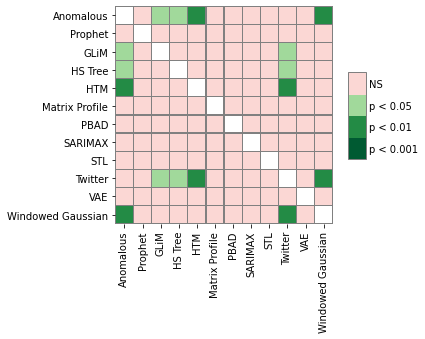

In [11]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

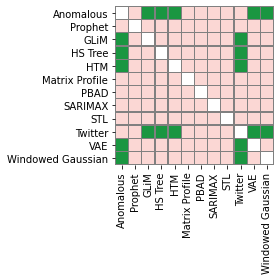

In [12]:
# specify a p value
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"seasonality",.1)

In [13]:
# specify a p value
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Trend

In [14]:
df = get_friedman_test_df(trend_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:123: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:87: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:132: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      0.0   0.0      0.0  2.0             0.0   
Prophet                  0.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                     0.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      2.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           0.0      0.0   0.0      0.0  0.0            -1.0   
PBAD                     0.0      0.0   0.0      0.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      0.0      0.0   0.0      0.0  0.0             0.0   
Twitter                  0.0      0.0   0.0      0.0  2.0             0.0   
VAE                      0.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        0.0      0.0   0.0      0.0  0.0             0.0   

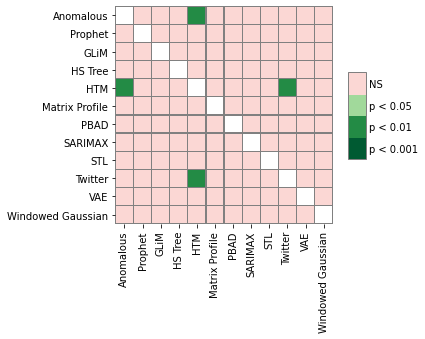

In [15]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

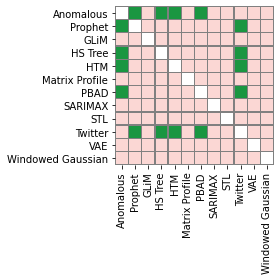

In [16]:
# specify a p value
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"trend",.1)

In [17]:
# specify a p value
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Concept Drift

In [18]:
df = get_friedman_test_df(conceptdrift_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:123: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:132: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      3.0   3.0      2.0  2.0             0.0   
Prophet                  3.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                     3.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  2.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      2.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           0.0      0.0   0.0      0.0  0.0            -1.0   
PBAD                     0.0      0.0   0.0      0.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      0.0      0.0   0.0      0.0  3.0             0.0   
Twitter                  0.0      3.0   3.0      2.0  2.0             0.0   
VAE                      0.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        3.0      0.0   0.0      0.0  0.0             0.0   

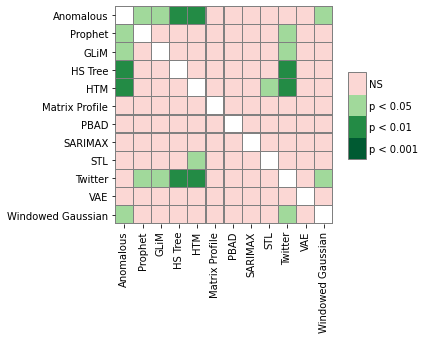

In [19]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

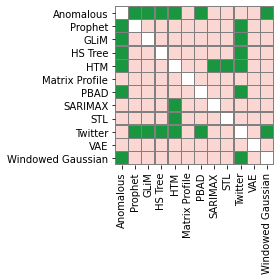

In [20]:
# specify a p value
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"conceptdrift",.1)

In [21]:
# specify a p value
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Missing

In [22]:
df = get_friedman_test_df_miss(missing_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:268: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
